In [ ]:
e! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download vaibhao/handwritten-characters

 98% 1.59G/1.62G [00:17<00:00, 170MB/s]
100% 1.62G/1.62G [00:17<00:00, 99.5MB/s]


In [ ]:
!unzip handwritten-characters.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Validation/F/167.jpg  
  inflating: dataset/Validation/F/168.jpg  
  inflating: dataset/Validation/F/169.jpg  
  inflating: dataset/Validation/F/17.jpg  
  inflating: dataset/Validation/F/170.jpg  
  inflating: dataset/Validation/F/171.jpg  
  inflating: dataset/Validation/F/172.jpg  
  inflating: dataset/Validation/F/173.jpg  
  inflating: dataset/Validation/F/174.jpg  
  inflating: dataset/Validation/F/175.jpg  
  inflating: dataset/Validation/F/176.jpg  
  inflating: dataset/Validation/F/177.jpg  
  inflating: dataset/Validation/F/178.jpg  
  inflating: dataset/Validation/F/179.jpg  
  inflating: dataset/Validation/F/18.jpg  
  inflating: dataset/Validation/F/180.jpg  
  inflating: dataset/Validation/F/181.jpg  
  inflating: dataset/Validation/F/182.jpg  
  inflating: dataset/Validation/F/183.jpg  
  inflating: dataset/Validation/F/184.jpg  
  inflating: dataset/Validation/F/185.jpg  
  inflating: dataset/Valida

In [ ]:
!pip install imutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
dir = "Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [ ]:
len(train_data)

140000

In [ ]:
val_dir = "Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [ ]:
len(val_data)

15209

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)


In [ ]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [ ]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [ ]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [ ]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [ ]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [ ]:
history = model.fit(train_X,train_Y, epochs=1, batch_size=64, validation_data = (val_X, val_Y),  verbose=1)

2188/2188 [==============================] - 175s 80ms/step - loss: 0.4989 - accuracy: 0.8359 - val_loss: 0.3055 - val_accuracy: 0.8963


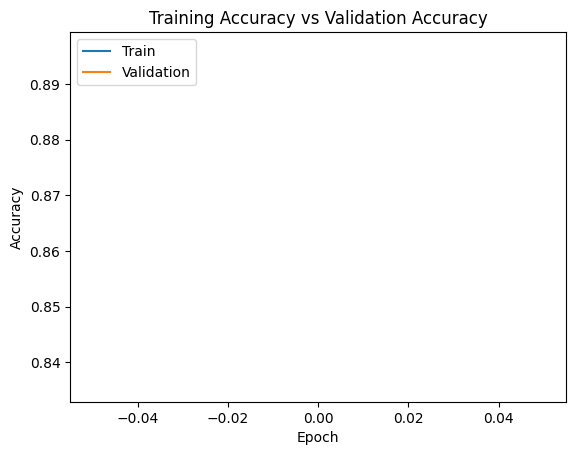

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

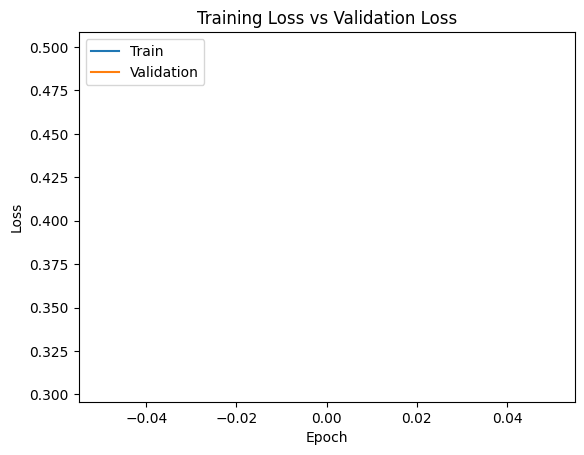

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))

    return (cnts, boundingBoxes)

In [ ]:
def get_letters(img):
    letters = []
    total_bbox_cordi = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            print([x,y,w,h])
            single_bbox_cordi = [x,y,w,h]
            total_bbox_cordi.append(single_bbox_cordi)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image, total_bbox_cordi

In [ ]:
def get_word(letter):
    word = "".join(letter)
    return word

In [ ]:
! kaggle datasets download landlord/handwriting-recognition

 99% 1.25G/1.26G [00:15<00:00, 152MB/s]
100% 1.26G/1.26G [00:15<00:00, 87.9MB/s]


In [ ]:
! unzip handwriting-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

[10, 15, 14, 17]
1/1 [==============================] - 0s 260ms/step
[26, 16, 10, 16]
1/1 [==============================] - 0s 24ms/step
[44, 15, 11, 17]
1/1 [==============================] - 0s 38ms/step
[62, 19, 11, 13]
1/1 [==============================] - 0s 23ms/step
[82, 15, 12, 18]
1/1 [==============================] - 0s 26ms/step
BEWE5
[[10, 15, 14, 17], [26, 16, 10, 16], [44, 15, 11, 17], [62, 19, 11, 13], [82, 15, 12, 18]]


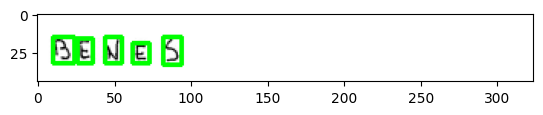

In [ ]:
letter,image, total_bbox_cordi = get_letters("train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[19, 11, 11, 13]
1/1 [==============================] - 0s 65ms/step
[30, 10, 12, 14]
1/1 [==============================] - 0s 58ms/step
[49, 11, 13, 14]
1/1 [==============================] - 0s 52ms/step
[65, 10, 15, 14]
1/1 [==============================] - 0s 71ms/step
[81, 9, 12, 16]
1/1 [==============================] - 0s 70ms/step
LIL0U
[[19, 11, 11, 13], [30, 10, 12, 14], [49, 11, 13, 14], [65, 10, 15, 14], [81, 9, 12, 16]]


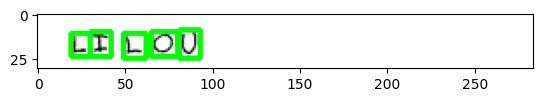

In [ ]:
letter,image,total_bbox_cordi = get_letters("train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[20, 8, 8, 14]
1/1 [==============================] - 0s 36ms/step
[35, 8, 10, 13]
1/1 [==============================] - 0s 25ms/step
[51, 9, 10, 16]
1/1 [==============================] - 0s 56ms/step
[66, 5, 12, 18]
1/1 [==============================] - 0s 40ms/step
[82, 8, 10, 18]
1/1 [==============================] - 0s 29ms/step
[97, 9, 12, 16]
1/1 [==============================] - 0s 28ms/step
[112, 10, 12, 17]
1/1 [==============================] - 0s 44ms/step
JAFFEVX
[[20, 8, 8, 14], [35, 8, 10, 13], [51, 9, 10, 16], [66, 5, 12, 18], [82, 8, 10, 18], [97, 9, 12, 16], [112, 10, 12, 17]]


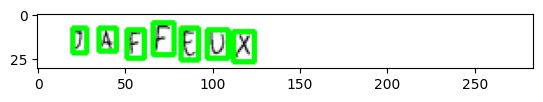

In [ ]:
letter,image, total_bbox_cordi = get_letters("train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[18, 8, 13, 19]
1/1 [==============================] - 0s 29ms/step
[33, 9, 12, 18]
1/1 [==============================] - 0s 24ms/step
[50, 8, 14, 18]
1/1 [==============================] - 0s 28ms/step
[65, 7, 15, 18]
1/1 [==============================] - 0s 35ms/step
RUPP
[[18, 8, 13, 19], [33, 9, 12, 18], [50, 8, 14, 18], [65, 7, 15, 18]]


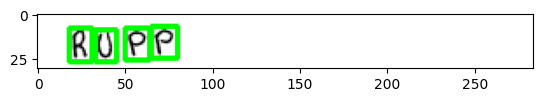

In [ ]:
letter,image,total_bbox_cordi = get_letters("validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[9, 15, 14, 16]
1/1 [==============================] - 0s 29ms/step
[28, 12, 13, 18]
1/1 [==============================] - 0s 28ms/step
[48, 13, 11, 17]
1/1 [==============================] - 0s 29ms/step
[65, 12, 13, 18]
1/1 [==============================] - 0s 31ms/step
[80, 13, 16, 16]
1/1 [==============================] - 0s 28ms/step
[99, 14, 13, 15]
1/1 [==============================] - 0s 23ms/step
[113, 14, 15, 17]
1/1 [==============================] - 0s 20ms/step
[135, 14, 13, 16]
1/1 [==============================] - 0s 19ms/step
[151, 13, 13, 17]
1/1 [==============================] - 0s 17ms/step
VALENTJNE
[[9, 15, 14, 16], [28, 12, 13, 18], [48, 13, 11, 17], [65, 12, 13, 18], [80, 13, 16, 16], [99, 14, 13, 15], [113, 14, 15, 17], [135, 14, 13, 16], [151, 13, 13, 17]]


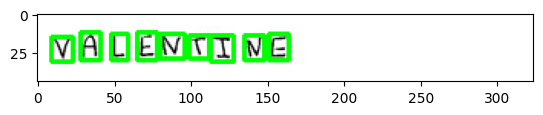

In [ ]:
letter,image, total_bbox_cordi = get_letters("test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

In [ ]:
letter

['V', 'A', 'L', 'E', 'N', 'T', 'J', 'N', 'E']

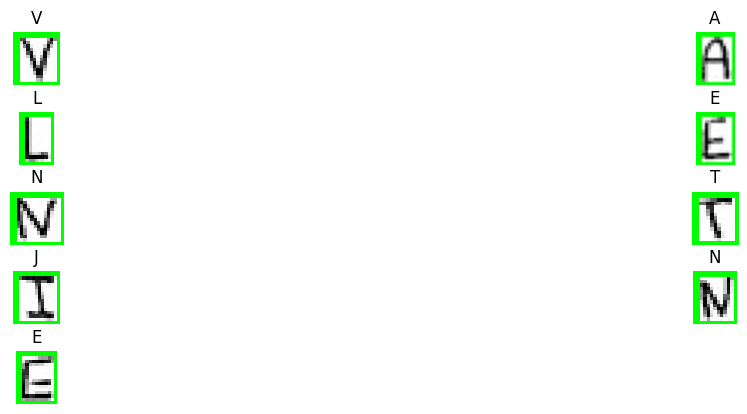

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0,len(total_bbox_cordi)):
    ax = plt.subplot(10, 2, i+1)
    t =total_bbox_cordi[i]
    x_min = t[0]
    y_min = t[1]
    w_min = t[2]
    h_min= t[3]
    cropped_image = image[y_min:y_min+h_min, x_min:x_min+w_min]
    plt.title(letter[i], fontsize=12)
    plt.imshow(cropped_image)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.5)

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
import os
os.chdir(r'/')

!tar -czf Landscapes.tar.gz /kaggle/working/saved_model

from IPython.display import FileLink

FileLink(r'Landscapes.tar.gz')

tar: Removing leading `/' from member names
tar: /kaggle/working/saved_model: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


/Landscapes.tar.gz